In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2
from skimage import io
import torch
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
from scipy import ndimage

In [4]:
def load(path):
    with open(path,'rb') as f:
        mnist = pickle.load(f)
    return mnist#mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

data_mnist = load("./MNIST/mnist.pkl")


In [3]:
data_mnist['training_images'].shape


(60000, 784)

In [4]:
#plt.imshow(img)


In [21]:
def load_ori_data(path):

    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data

def adjust_shape(img):
    if len(img.shape) == 1:
        H = int(np.sqrt(len(img)))
        img = img.reshape(H,H)
    return img

def adjust_convert_tensor(tensor):
    if type(tensor).__name__ == "Tensor":
        tensor = tensor.numpy()
    return tensor
        
def read_plot(ori_path, perm_path, rotation_path,num_plot):
    
    ori_data = load_ori_data(ori_path)
    ori_data = ori_data['training_images'] 
    print("plain data loaded!")
    num_imgs = ori_data.shape[0]
    random_id = np.random.randint(0,num_imgs-1)
    img_to_show = ori_data[random_id]
    img_to_show = adjust_shape(img_to_show)
    
    plt.figure(figsize=(16,6))
    plt.subplots_adjust(bottom=0.08, top=0.92, left=0.10, right=0.95, hspace=0.15, wspace=1.2)
    
    plt.subplot(3,num_plot,1)
    plt.imshow(img_to_show)
    plt.title("Randomly selected image")
    plt.axis('off')
    del ori_data
    
    task_data = torch.load(perm_path)
    print("perm data loaded!")
    task_data = task_data[0]  # get train, 1 is test   
    num_task = len(task_data) 
    task_id = np.linspace(0, num_plot-1, num_plot,dtype=int)
    
    for i, t_id in enumerate(task_id):
        plt.subplot(3,num_plot,i+num_plot+1)
        img_to_show = adjust_convert_tensor(adjust_shape(task_data[t_id][1][random_id]))
        plt.imshow(img_to_show)
        plt.axis('off')
        plt.title("Permutation task {}".format(t_id))
    
    task_data = torch.load(rotation_path)
    print("rotation data loaded")
    task_data = task_data[0]
    for i, t_id in enumerate(task_id):
        
        plt.subplot(3,num_plot,i+1+2*num_plot)
        img_to_show = adjust_convert_tensor(adjust_shape(task_data[t_id][1][random_id]))

        plt.imshow(img_to_show)
        plt.axis('off')
        plt.title("Rotation task {}".format(t_id))
    #plt.tight_layout()
    #plt.savefig("./tasks_sample.png")
    plt.show()
        

plain data loaded!
perm data loaded!
rotation data loaded


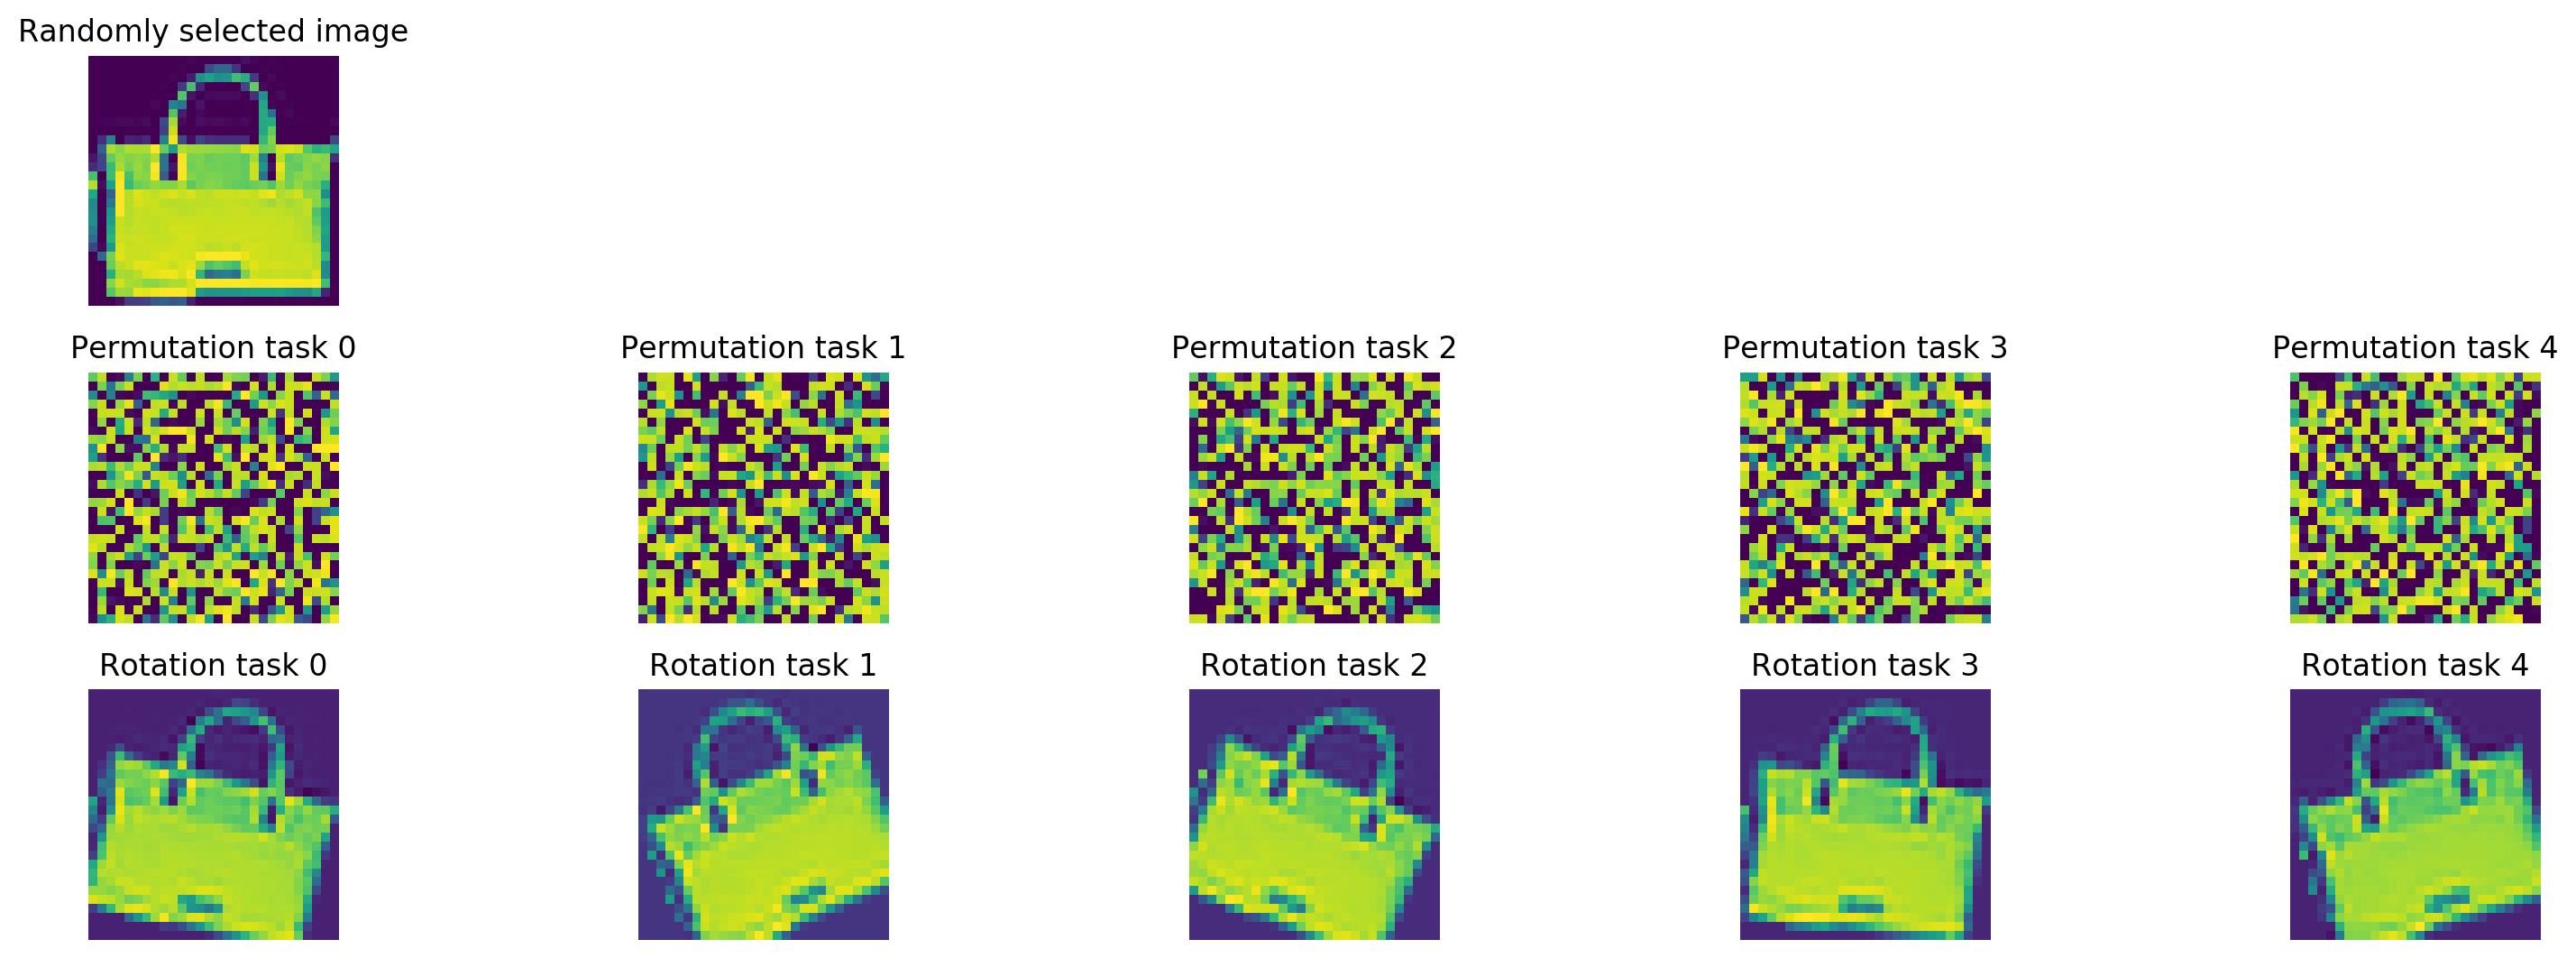

In [19]:
fashion_ori_path = "./fashion/fashionMnist.pkl"
fashion_perm_path = "./Data_Processed_STL/fashion/fashion_permutation.pt"
fashion_rotation_path = "./Data_Processed_STL/fashion/fashion_rotation.pt"
plt.rcParams['figure.dpi'] = 200
read_plot(fashion_ori_path, fashion_perm_path, fashion_rotation_path,num_plot=5)

plain data loaded!
perm data loaded!
rotation data loaded


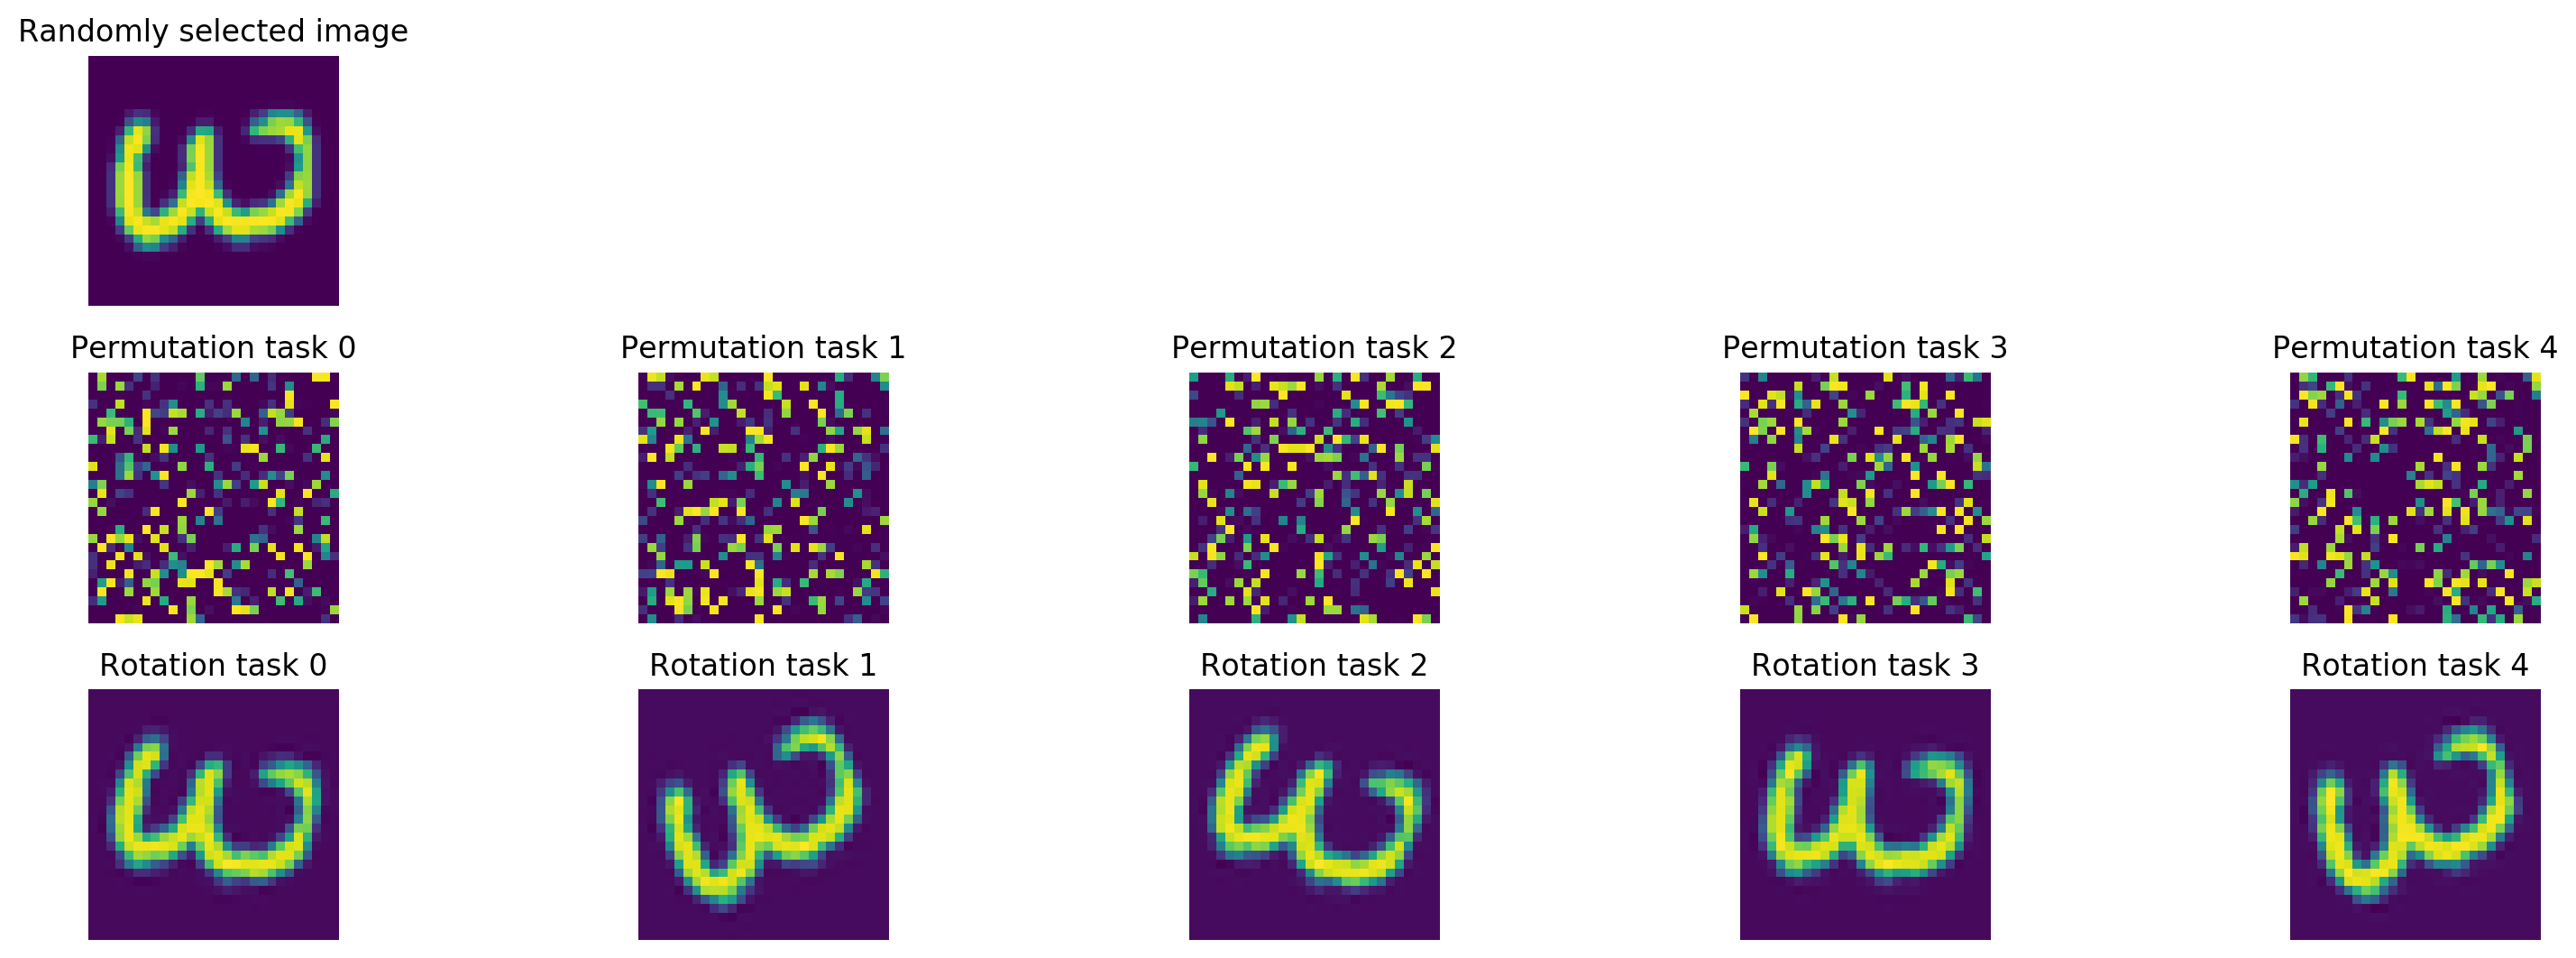

In [22]:
emnist_ori_path = "./EMNIST/emnist.pkl"
emnist_perm_path = "./Data_Processed_STL/EMNIST/emnist_permutation.pt"
emnist_rotation_path = "./Data_Processed_STL/EMNIST/emnist_rotation.pt"
plt.rcParams['figure.dpi'] = 200
read_plot(emnist_ori_path, emnist_perm_path, emnist_rotation_path,num_plot=5)

plain data loaded!
perm data loaded!
rotation data loaded


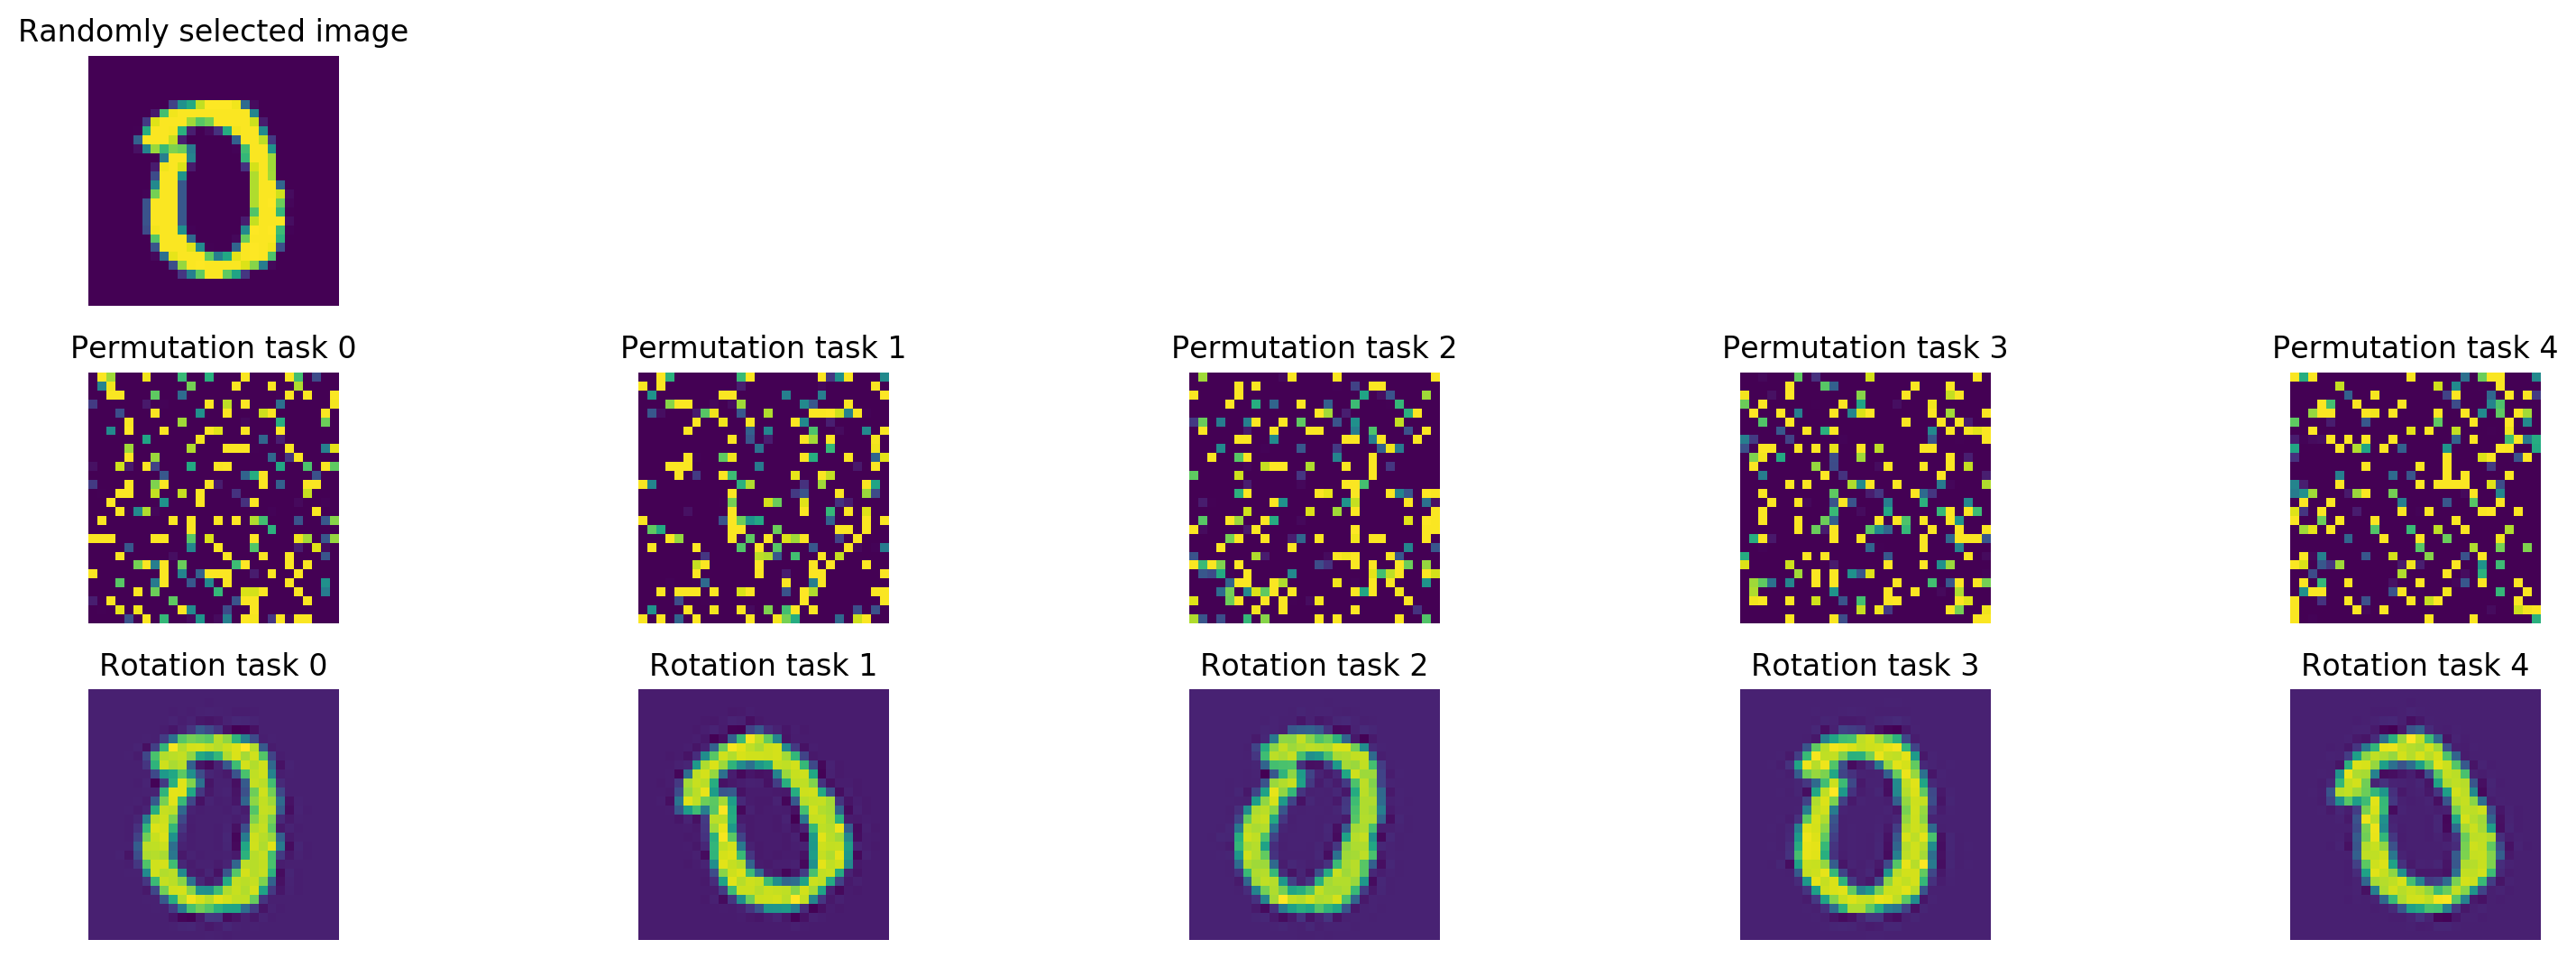

In [23]:
mnist_ori_path = "./MNIST/mnist.pkl"
mnist_perm_path = "./Data_Processed_STL/MNIST/mnist_permutation.pt"
mnist_rotation_path = "./Data_Processed_STL/MNIST/mnist_rotation.pt"
plt.rcParams['figure.dpi'] = 200
read_plot(mnist_ori_path, mnist_perm_path, mnist_rotation_path,num_plot=5)